# Group 4 Data Processing/Modeling

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Dataset

In [3]:
data = pd.read_csv('maint_copy.csv')

#### Understanding dataset

In [4]:
data.shape

(10000, 15)

In [5]:
list(data.columns.values)

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF',
 'diff']

In [6]:
unique_UDI_count = data['UDI'].nunique()
print("Number of unique IDs:", unique_UDI_count)

Number of unique IDs: 10000


Okay as you can see here, it's spelled UDI, and not UID. In the meantime, keep your eye out on this until we can change it. 

In [7]:
unique_ProductID_count = data['Product ID'].nunique()
print("Number of unique Product IDs:", unique_ProductID_count)

Number of unique Product IDs: 10000


Contrary to good practice, someone input ProductID as Product ID, there is a SPACE in the middle, please be mindful until we can change it. 

In [8]:
unique_Type_count = data['Type'].nunique()
print("Number of unique Types:", unique_Type_count)

Number of unique Types: 3


Please look at the code above. There is only three unique values. Just like how on the Titanic Dataset for the embark column, we need to do a one-hot encoding (or whatever it's called) for this column. Split these three values in three columns and add either Boolean values or 0 and 1s (I opt for the latter).

In [9]:
print(data.head())

    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0  5910     H35323    H                300.7                    310.2   
1    70     L47249    L                298.9                    309.0   
2  1325     M16184    M                298.8                    310.1   
3  1497     L48676    L                298.0                    308.7   
4  3612     L50791    L                301.7                    310.9   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1364         65.3              208                1    1   
1                    1410         65.7              191                1    0   
2                    1243         74.5              194                1    0   
3                    1268         69.4              189                1    0   
4                    1405         46.4              207                1    1   

   HDF  PWF  OSF  RNF  diff  
0    0    1    1    0     2  
1    0    1   

In [10]:
# The count and frequency of values in Type
data['Type'].unique()
frequency_type = data['Type'].value_counts()
print(frequency_type)


percentage_type = data['Type'].value_counts(normalize=True) * 100
type_summary = pd.DataFrame({'Count': frequency_type, 'Percentage': percentage_type})
print(type_summary)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
   Count  Percentage
L   6000       60.00
M   2997       29.97
H   1003       10.03


Okay this is some good variation

In [11]:
# The count and frequency of values in Machine Failure
data['Machine failure'].unique()
frequency_machine_fail = data['Machine failure'].value_counts()
print(frequency_machine_fail)

percentage_machine_fail = data['Machine failure'].value_counts(normalize=True) * 100
machine_fail_summary = pd.DataFrame({'Count': frequency_machine_fail, 'Percentage': percentage_machine_fail})
print(machine_fail_summary)

0    9661
1     339
Name: Machine failure, dtype: int64
   Count  Percentage
0   9661       96.61
1    339        3.39


I don't really like those numbers, remember to discuss

In [12]:
# The count and frequency of values in TWF
data['TWF'].unique()
frequency_TWF = data['TWF'].value_counts()
print(frequency_TWF)

percentage_TWF = data['TWF'].value_counts(normalize=True) * 100
TWF_summary = pd.DataFrame({'Count': frequency_TWF, 'Percentage': percentage_TWF})
print(TWF_summary)

0    9954
1      46
Name: TWF, dtype: int64
   Count  Percentage
0   9954       99.54
1     46        0.46


Again, not good, but I'm not sure if this percentage matters.

In [13]:
# The count and frequency of values in HDF
data['HDF'].unique()
frequency_HDF = data['HDF'].value_counts()
print(frequency_HDF)

percentage_HDF = data['HDF'].value_counts(normalize=True) * 100
HDF_summary = pd.DataFrame({'Count': frequency_HDF, 'Percentage': percentage_HDF})
print(HDF_summary)

0    9885
1     115
Name: HDF, dtype: int64
   Count  Percentage
0   9885       98.85
1    115        1.15


In [14]:
# The count and frequency of values in PWF
data['PWF'].unique()
frequency_PWF = data['PWF'].value_counts()
print(frequency_PWF)

percentage_PWF = data['PWF'].value_counts(normalize=True) * 100
PWF_summary = pd.DataFrame({'Count': frequency_PWF, 'Percentage': percentage_PWF})
print(PWF_summary)

0    9905
1      95
Name: PWF, dtype: int64
   Count  Percentage
0   9905       99.05
1     95        0.95


In [15]:
# The count and frequency of values in OSF
data['OSF'].unique()
frequency_OSF = data['OSF'].value_counts()
print(frequency_OSF)

percentage_OSF = data['OSF'].value_counts(normalize=True) * 100
OSF_summary = pd.DataFrame({'Count': frequency_OSF, 'Percentage': percentage_OSF})
print(OSF_summary)

0    9902
1      98
Name: OSF, dtype: int64
   Count  Percentage
0   9902       99.02
1     98        0.98


In [16]:
# The count and frequency of values in RNF
data['RNF'].unique()
frequency_RNF = data['RNF'].value_counts()
print(frequency_RNF)

percentage_RNF = data['RNF'].value_counts(normalize=True) * 100
RNF_summary = pd.DataFrame({'Count': frequency_RNF, 'Percentage': percentage_RNF})
print(RNF_summary)

0    9981
1      19
Name: RNF, dtype: int64
   Count  Percentage
0   9981       99.81
1     19        0.19


Just double-checking that there is for sure no missing values

In [17]:
missing_values = data.isnull().sum()
print(missing_values)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
diff                       0
dtype: int64


/var/folders/c7/mwgyyxds33bg8rksxm07_r_00000gn/T/ipykernel_4546/3900836507.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.drop(columns=columns_to_exclude).corr()


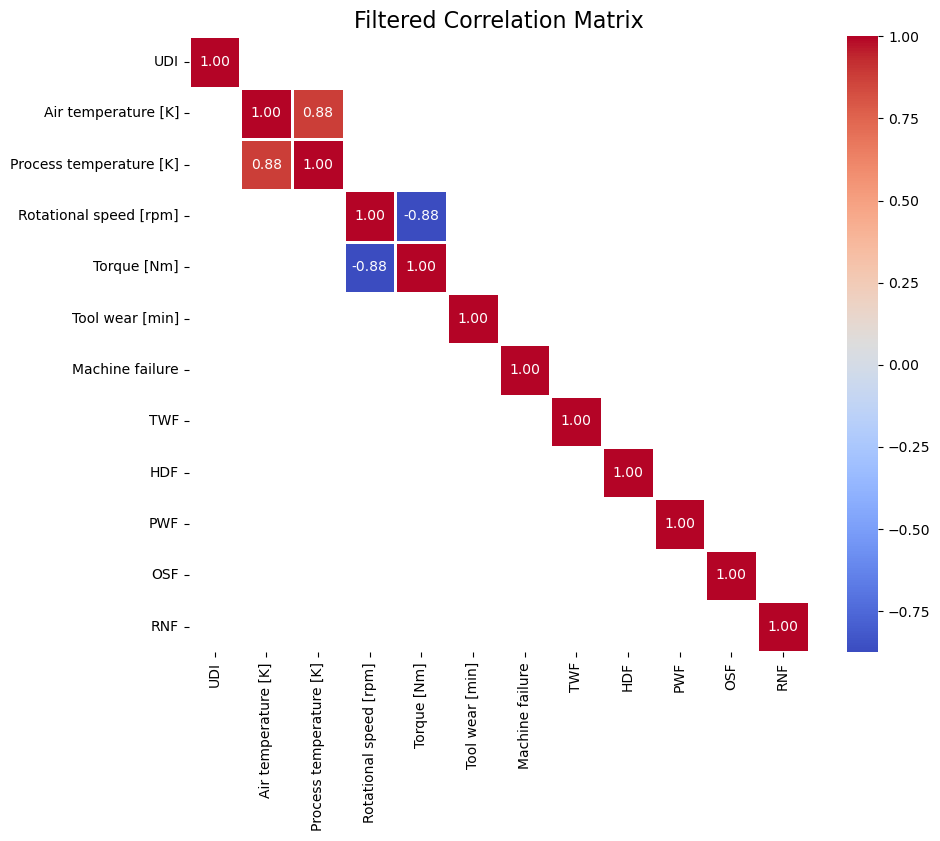

In [22]:
columns_to_exclude = ["diff"]  
corr_matrix = data.drop(columns=columns_to_exclude).corr()
filtered_corr = corr_matrix[(corr_matrix > 0.6) | (corr_matrix < -0.6)]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths= None, mask=filtered_corr.isnull())
plt.title('Filtered Correlation Matrix', fontsize = 16)
plt.show()